In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import numpy as np

# Raw values for 'Animal', 'CSCG', 'Hebbian-RNN'
animal_values = [0.07591265297852602, 0.039987456611710555, 0.0636189559724969, 0.037750875669049645, 0.06877763345032822,
                 0.04962032882298326, 0.08051751789029703, 0.0851175355650337, 0.07882158152048885, 0.05570816614751591,
                 0.047213405975605645]
CSCG_values = [0.01124321, 0.01076764, 0.01237898, 0.01122767, 0.01144429, 0.01094654,
               0.01709019, 0.01078433, 0.01121301, 0.01116816, 0.01116733, 0.01139205,
               0.01153114, 0.01067931, 0.01644526, 0.01095712, 0.01107633, 0.01122475,
               0.01123311, 0.01106954]
Hebbian_RNN_values = [0.008234771708415831, -0.008805470924869357, -0.016793775791593968,
                      -0.018682891599023164, -0.011201343109121185, -0.02118404899917737,
                      -0.020487303977211976, -0.018575775466465196, -0.021975870577615193,
                      0.0034879937826388743]
LSTM_values = [0.3998226146772882,
 0.4049226857740502,
 0.47090996313553785,
 0.3281264501728665,
 0.3739589049583544,
 0.4305966131621619,
 0.39889681867075666,
 0.45996414986275297,
 0.497127996345118,
 0.4489253570404211] ## online

Transformer_values = [0.50278039, 0.49418243, 0.50850751, 0.46868897, 0.49127309, 0.5215042,
 0.50318885, 0.48969504, 0.49660975, 0.50995818]

Vanilla_RNN_ReLU = [0.36232775, 0.40378101, 0.36907639, 0.43682382, 0.40519611,
       0.45322131, 0.40519663, 0.35112898, 0.44199089, 0.33987945]

Vanilla_RNN_Softmax = [0.02741914, 0.06313697, 0.03279823, 0.02199352, 0.08860925,
       0.03230627, 0.0306104 , 0.02292516, 0.04203958, 0.02736702,
       0.02948938, 0.04636457, 0.02562183, 0.06242836, 0.03340852,
       0.0316519 , 0.04382433, 0.03451653, 0.02845209, 0.05027237,
       0.03126598, 0.04228719, 0.03997411, 0.03031752, 0.03443493,
       0.04429395, 0.04298155, 0.03785387, 0.0338097 , 0.03407815,
       0.02404666, 0.0594176 , 0.02085176, 0.04461761, 0.02727575,
       0.0393253 , 0.02488522, 0.04803677, 0.03047051, 0.04052144,
       0.03975911, 0.02952771]
Vanilla_RNN_Polynomial = [0.03277494, 0.04674615, 0.04234426, 0.03389724, 0.02905386,
       0.03375014, 0.02635642, 0.02715806, 0.0357927 , 0.02338638,
       0.02771884, 0.0290008 , 0.03191504, 0.03395377, 0.02568105,
       0.0276187 , 0.02977923, 0.03891252, 0.03659744, 0.0264868 ,
       0.03084494, 0.03590577, 0.02699788, 0.0360434 , 0.03233703,
       0.02908185, 0.03131645, 0.03354202, 0.03714075, 0.03403884,
       0.02434686, 0.05099721, 0.04303191, 0.0265286 , 0.0354147 ,
       0.02805073, 0.03457009, 0.03891381, 0.02843768, 0.02356205,
       0.03343306, 0.02952824, 0.04625728, 0.03585127, 0.03066686,
       0.02778468, 0.02540682]

Vanilla_RNN_Sigmoid = [0.42705144, 0.19785494, 0.1958311 , 0.27576551, 0.81954483,
       0.2841871 , 0.62480322, 0.25572008, 0.99803062, 0.99897323,
       0.26440759, 0.80034655]

LSTM_Corrpen = [0.01130114, 0.01250476, 0.01027668, 0.01079539]

LSTM_L1 = [0.25092799, 0.25802236, 0.28315111, 0.24504408]

LSTM_Dropout = [0.35271576, 0.35549238, 0.44852973, 0.27786672, 0.27768864, 0.46456142,
 0.24547197, 0.23109883]

LSTM_no_reg_c = [0.94353789, 0.99597835, 0.99345673, 0.66287704, 0.6391217 ,
       0.98357835, 0.76892366, 0.99176881, 0.99879225, 0.9863707 ,
       0.63577193, 0.99986869, 0.70765926, 0.53050168, 0.99832331,
       0.55615752, 0.99721947, 0.43058742, 0.82322492, 0.99432002]

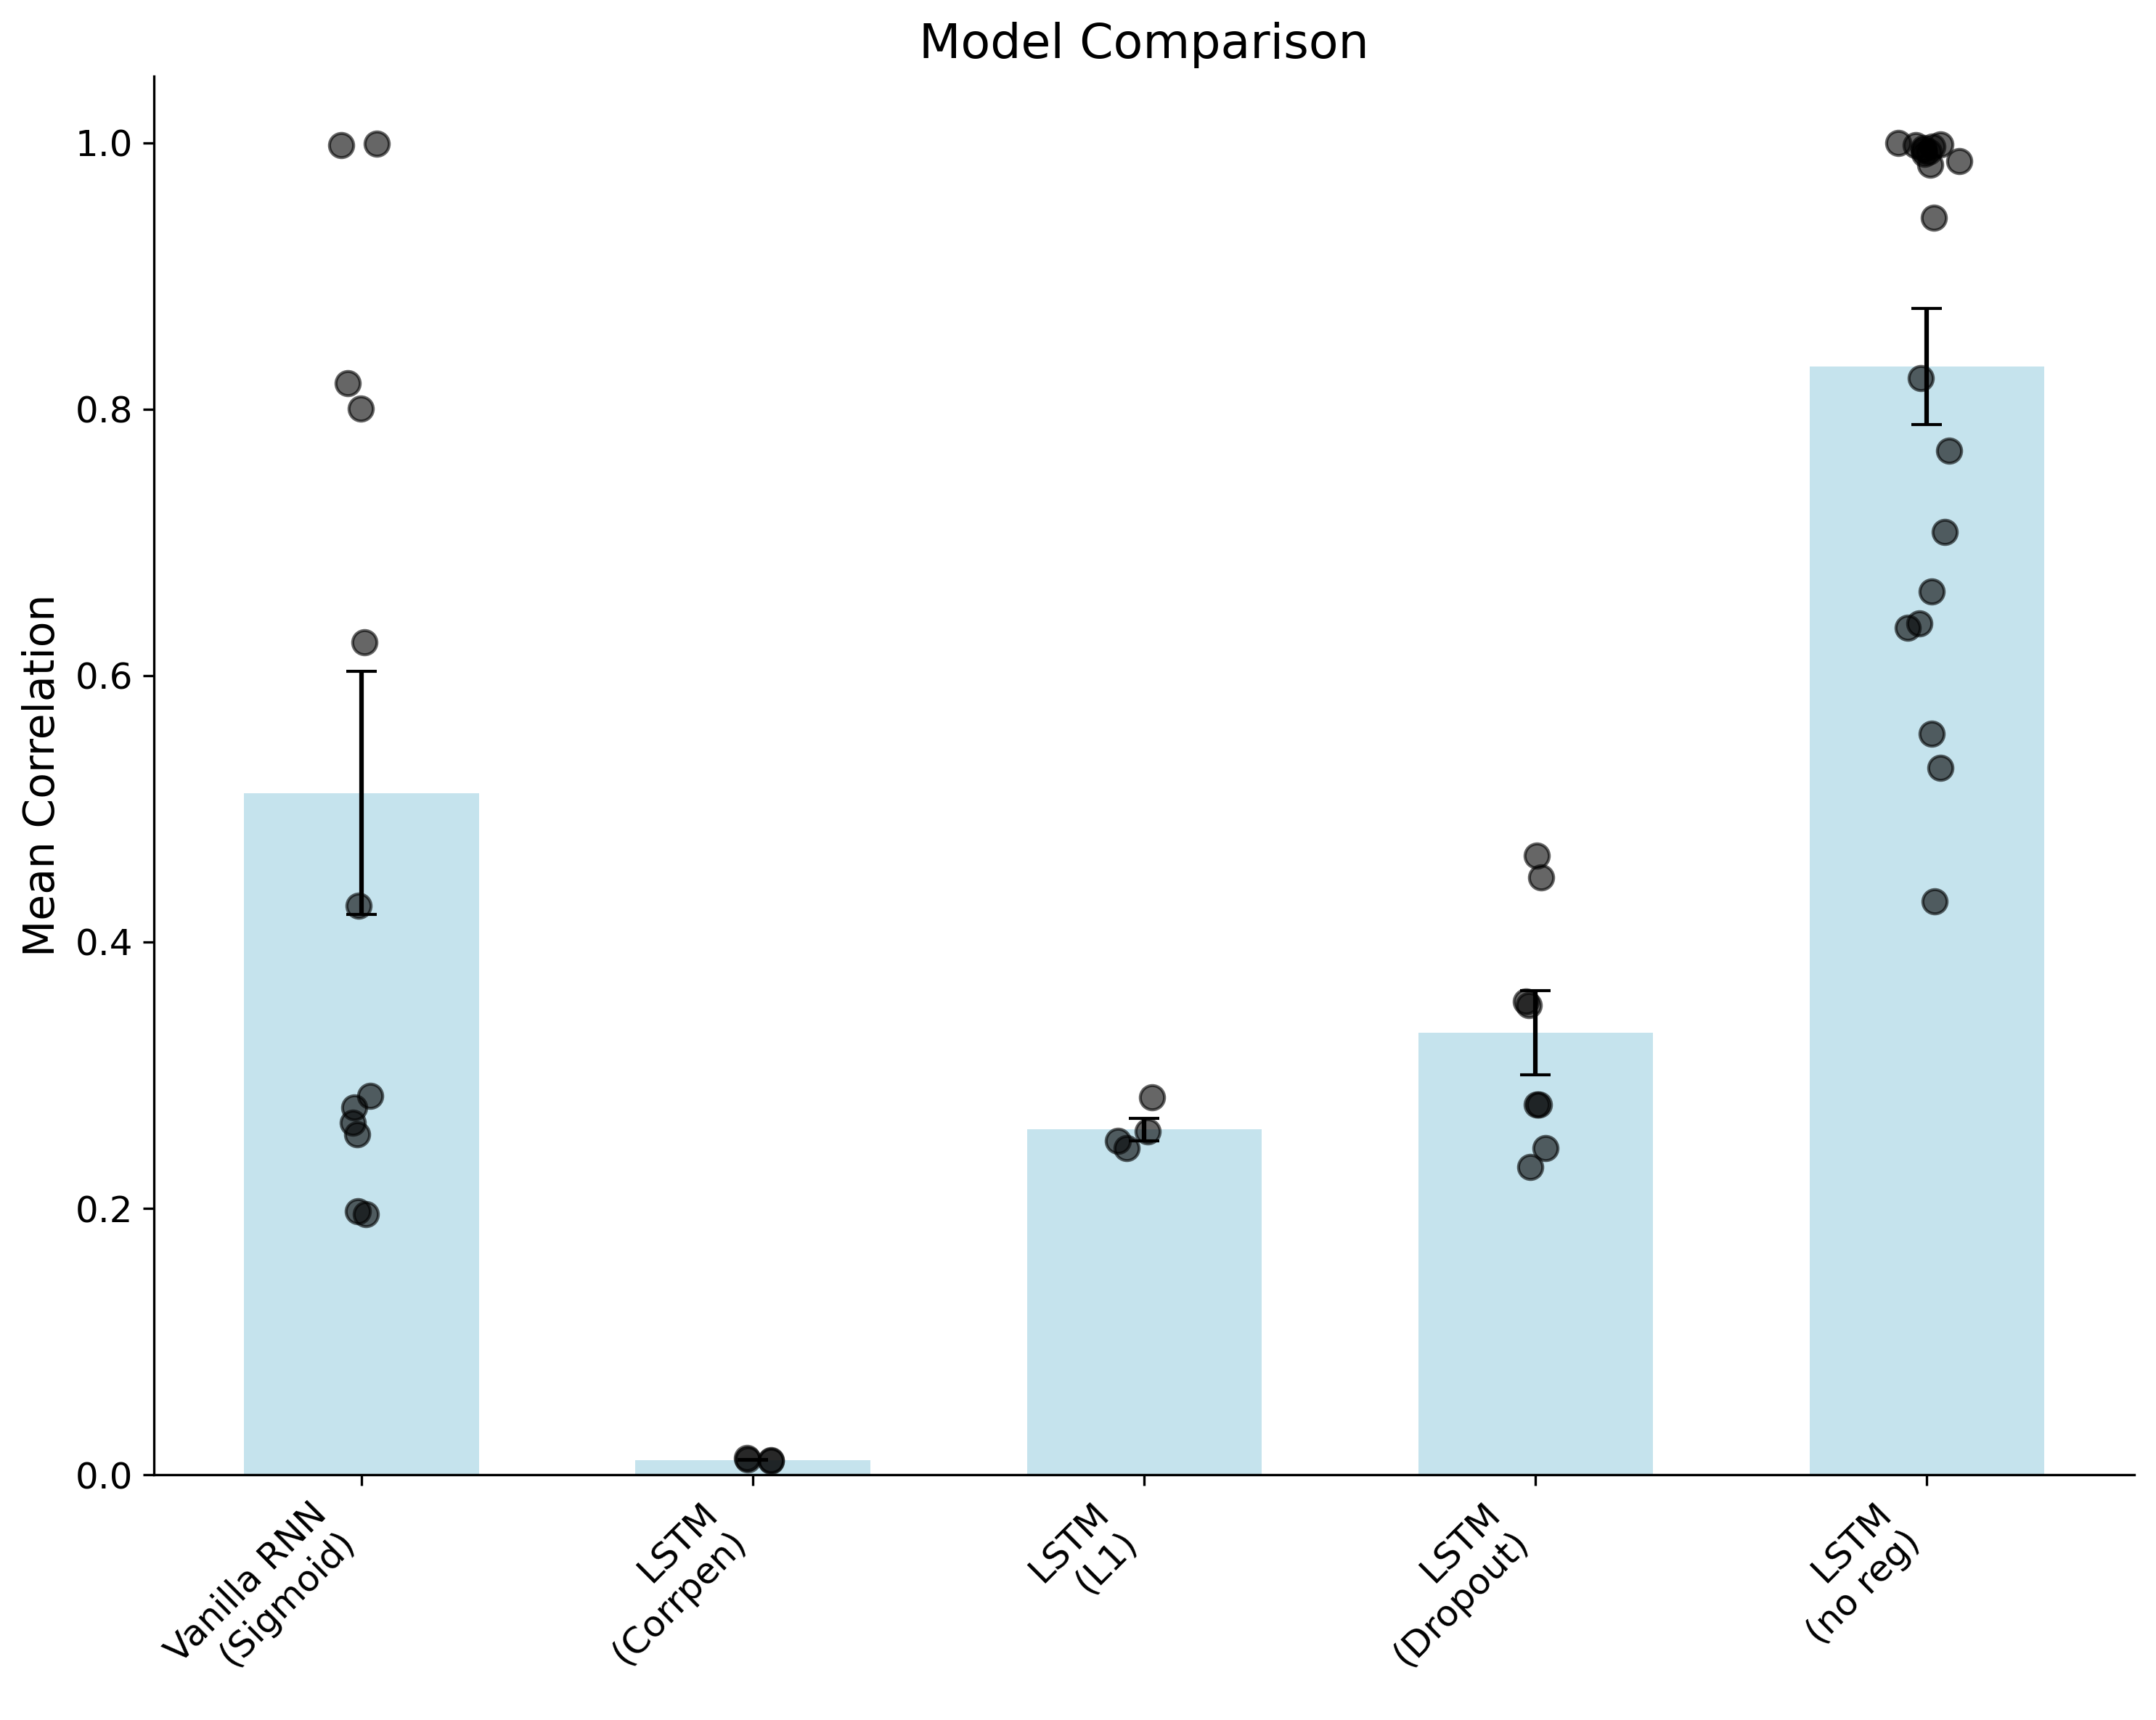

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Model data
models = {
    'Vanilla RNN\n(Sigmoid)': [0.42705144, 0.19785494, 0.1958311, 0.27576551, 0.81954483,
                               0.2841871, 0.62480322, 0.25572008, 0.99803062, 0.99897323,
                               0.26440759, 0.80034655],
    'LSTM\n(Corrpen)': [0.01130114, 0.01250476, 0.01027668, 0.01079539],
    'LSTM\n(L1)': [0.25092799, 0.25802236, 0.28315111, 0.24504408],
    'LSTM\n(Dropout)': [0.35271576, 0.35549238, 0.44852973, 0.27786672, 0.27768864, 0.46456142,
                        0.24547197, 0.23109883],
    'LSTM\n(no reg)': [0.94353789, 0.99597835, 0.99345673, 0.66287704, 0.6391217,
                       0.98357835, 0.76892366, 0.99176881, 0.99879225, 0.9863707,
                       0.63577193, 0.99986869, 0.70765926, 0.53050168, 0.99832331,
                       0.55615752, 0.99721947, 0.43058742, 0.82322492, 0.99432002]
}

# Calculate means and standard errors
means = [np.mean(values) for values in models.values()]
errors = [stats.sem(values) for values in models.values()]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Plot vertical bars
x_pos = np.arange(len(models))
bars = ax.bar(x_pos, means, align='center', alpha=0.7, color='lightblue', width=0.6)

# Add error bars
ax.errorbar(x_pos, means, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Add jittered dots for individual data points
for i, (model, values) in enumerate(models.items()):
    x = np.random.normal(i, 0.04, size=len(values))
    ax.plot(x, values, 'o', color='black', markersize=8, alpha=0.6)

# Customize the plot
ax.set_xticks(x_pos)
ax.set_xticklabels(models.keys(), rotation=45, ha='right')
ax.set_ylabel('Mean Correlation', fontsize=14)
ax.set_title('Model Comparison', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('vertical_model_comparison_plot.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

In [5]:
from scipy.stats import ttest_ind

# Print sample sizes (N) for each model
print("Sample sizes (N) for each model:")
for model_name, model_values in models.items():
    print(f"{model_name}: N = {len(model_values)}")

# Specify the type of test
test_type = "two-tailed"
print(f"\nPerforming unpaired {test_type} t-tests comparing each model to {base_model_name}:")

# Model to compare against
base_model_name = 'LSTM\n(Corrpen)'
base_model_values = models[base_model_name]

# Perform unpaired t-tests
for model_name, model_values in models.items():
    if model_name == base_model_name:
        continue  # Skip comparison with itself
    
    # Perform unpaired t-test
    n1 = len(base_model_values)
    n2 = len(model_values)
    t_stat, p_value = ttest_ind(base_model_values, model_values, equal_var=False)
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    
    # Print results
    print(f'{model_name}: n1 = {n1}, n2 = {n2}, p = {p_value:.4f}, {significance} ({test_type} test)')


Sample sizes (N) for each model:
Vanilla RNN
(Sigmoid): N = 12
LSTM
(Corrpen): N = 4
LSTM
(L1): N = 4
LSTM
(Dropout): N = 8
LSTM
(no reg): N = 20

Performing unpaired two-tailed t-tests comparing each model to LSTM
(Corrpen):
Vanilla RNN
(Sigmoid): n1 = 4, n2 = 12, p = 0.0002, Significant (two-tailed test)
LSTM
(L1): n1 = 4, n2 = 4, p = 0.0001, Significant (two-tailed test)
LSTM
(Dropout): n1 = 4, n2 = 8, p = 0.0000, Significant (two-tailed test)
LSTM
(no reg): n1 = 4, n2 = 20, p = 0.0000, Significant (two-tailed test)
